In [664]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [665]:
car_df = pd.read_csv(
    "https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/german_used_cars.csv",
    index_col=0,
)
car_df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [666]:
# большинство типов данных - object, надо провести спецификацию и заодно почистить
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  object

In [667]:
# убираем лишний текст, чтобы привести столбцы к вычисляемому типу
car_df["fuel_consumption_l_100km"] = car_df["fuel_consumption_l_100km"].apply(
    lambda x: str(x).split(" ")[0].replace(",", ".")
)
car_df["fuel_consumption_g_km"] = car_df["fuel_consumption_g_km"].apply(
    lambda x: str(x).split(" ")[0].replace(",", ".")
)

In [668]:
# чистим от нечисловых значений и неправильных дат
convert_to_num = [
    "price_in_euro",
    "power_kw",
    "power_ps",
    "fuel_consumption_l_100km",
    "fuel_consumption_g_km",
]
convert_to_dt = ["registration_date", "year"]

car_df[convert_to_num] = car_df[convert_to_num].apply(pd.to_numeric, errors="coerce")
car_df[convert_to_dt] = car_df[convert_to_dt].apply(pd.to_datetime, errors="coerce")

# теперь датасет выглядит гораздо лучше и можно начать что-то делать с данными
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     251079 non-null  object        
 1   model                     251079 non-null  object        
 2   color                     250913 non-null  object        
 3   registration_date         250882 non-null  datetime64[ns]
 4   year                      250880 non-null  datetime64[ns]
 5   price_in_euro             250880 non-null  float64       
 6   power_kw                  250786 non-null  float64       
 7   power_ps                  250869 non-null  float64       
 8   transmission_type         251079 non-null  object        
 9   fuel_type                 251079 non-null  object        
 10  fuel_consumption_l_100km  223046 non-null  float64       
 11  fuel_consumption_g_km     214274 non-null  float64       
 12  mileage

/var/folders/mk/srk2d63n62qc5h8z461_xl000000gn/T/ipykernel_1628/3015630805.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  car_df[convert_to_dt] = car_df[convert_to_dt].apply(pd.to_datetime, errors="coerce")


In [669]:
car_df.isna().mean() * 100

brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.078461
year                         0.079258
price_in_euro                0.079258
power_kw                     0.116696
power_ps                     0.083639
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    11.165012
fuel_consumption_g_km       14.658733
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64

In [670]:
def cont_data(df):
    df = df[
        [
            "price_in_euro",
            "power_kw",
            "power_ps",
            "fuel_consumption_l_100km",
            "fuel_consumption_g_km",
            "mileage_in_km",
        ]
    ]
    return df


cont_data(car_df).describe()

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,2.508800e+05,250786.000000,250869.000000,223046.000000,214274.000000,2.509270e+05
mean,2.613753e+04,126.477379,171.809526,7.207217,143.286384,8.534002e+04
std,3.698795e+04,75.301763,99.192201,33.315899,72.777808,7.871706e+04
min,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.199000e+04,82.000000,111.000000,4.900000,116.000000,2.490400e+04
50%,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.750000e+04
75%,2.995000e+04,140.000000,190.000000,6.800000,163.000000,1.265000e+05
max,5.890500e+06,2023.000000,2022.000000,2023.000000,2023.000000,3.800000e+06


Максимальное значение потребления топлива и мощности очень похоже на год выпуска автомобиля. Проверим, так ли это

In [671]:
car_df[car_df["year"].isna()].head(10)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
2400,audi,Audi A4,grey,NaT,NaT,NaN,NaN,75.0,Manual,07/2004,187.0,2004.0,2460.0,Avant 1.6 *TÜV 09/23
2743,audi,Audi A4,silver,NaT,NaT,NaN,2005.0,NaN,Automatic,74.194 km,NaN,NaN,NaN,Lim. 2.0
5297,audi,Audi A1,blue,NaT,NaT,NaN,2011.0,NaN,Manual,110.250 km,NaN,NaN,NaN,1.4 TFSI Ambition
9616,audi,Audi A1,white,NaT,NaT,NaN,NaN,90.0,Manual,06/2014,128.0,2014.0,12250.0,Sportback Sportline
12206,audi,Audi A6,black,NaT,NaT,NaN,NaN,140.0,Manual,12/2016,119.0,2016.0,21250.0,Avant 2.0 TDI ultra
13554,audi,Audi A5,grey,NaT,NaT,NaN,NaN,NaN,Automatic,Automatic,2017.0,NaN,NaN,Sportback qu S-LINE PANO B&amp
13596,audi,Audi A4,grey,NaT,NaT,NaN,NaN,NaN,Automatic,Automatic,2017.0,NaN,NaN,quattro sport Avant - 3.0
16632,audi,Audi SQ2,blue,NaT,NaT,NaN,NaN,221.0,Automatic,12/2019,159.0,2019.0,31585.0,2.0 TFSI quattro S tronic
22673,audi,Audi Q8,white,NaT,NaT,NaN,NaN,250.0,Automatic,06/2023,415.0,2023.0,85990.0,Sportback S line 50 e-tron quattro
24574,bmw,BMW 316,silver,NaT,NaT,NaN,NaN,NaN,Manual,Manual,2003.0,NaN,NaN,316ti compact: TÜV


Как видно из таблицы выше - помимо года выпуска не хватает многих других данных и они тоже все перепутаны. Можно конечно подушнить и в полуручном режиме разнести эти данные, но КПД такого занятия будет крайне неэффективным. И так как % отсутствующих данных в целом по датафрейму довольно низок (кроме потребления топлива, к которым мы еще вернемся), то удаление этих строк не будет иметь негативного влияния на объективность анализа, а вполне возможно, что станет даже лучше.

И проверим как изменились основные параметры данных датафрейма

In [672]:
car_df = car_df.dropna(
    subset=["price_in_euro", "registration_date", "year", "power_kw", "power_ps"],
    how="any",
)
cont_data(car_df).describe()

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,2.507520e+05,250752.000000,250752.000000,222840.000000,214076.000000,2.506920e+05
mean,2.611763e+04,126.221115,171.693618,6.764408,142.442164,8.537758e+04
std,3.685548e+04,72.018901,97.890860,17.479861,60.747560,7.872525e+04
min,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.199000e+04,82.000000,111.000000,4.900000,116.000000,2.495975e+04
50%,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.752900e+04
75%,2.995000e+04,140.000000,190.000000,6.800000,163.000000,1.265500e+05
max,5.890500e+06,735.000000,999.000000,739.000000,999.000000,3.800000e+06


In [673]:
car_df.isna().mean() * 100

brand                        0.000000
model                        0.000000
color                        0.066201
registration_date            0.000000
year                         0.000000
price_in_euro                0.000000
power_kw                     0.000000
power_ps                     0.000000
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    11.131317
fuel_consumption_g_km       14.626404
mileage_in_km                0.023928
offer_description            0.000000
dtype: float64

Проанализируем общее состояние каждого показателя, сравним "нормальное состояние" и "выбросы"

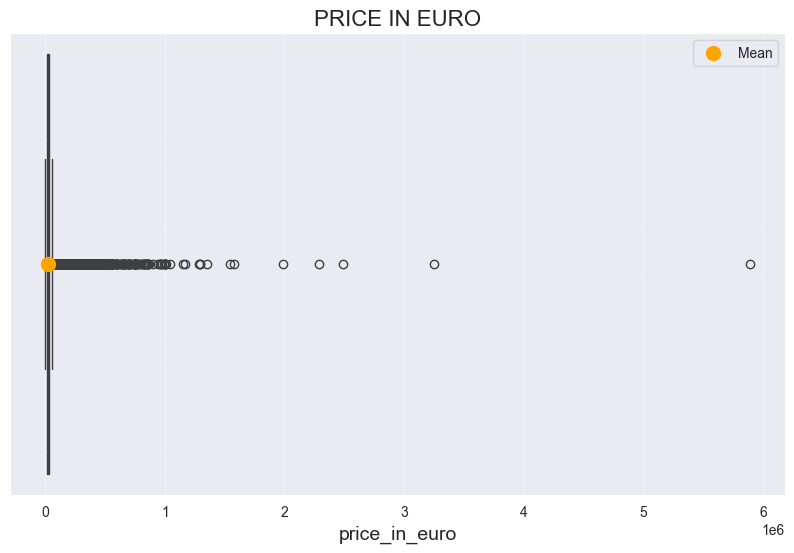

In [674]:
def box_plot(df, slc: list):
    for col in df.columns[
        slc
    ]:  # индекс списка - столбец с данными для анализа, для экономии места можно выбирать нужный столбец по необходимости, а не все сразу
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col], flierprops=dict(marker="o", color="red", markersize=6))

        plot_title = col.upper().replace("_", " ")

        plt.title(f"{plot_title}", fontsize=16)
        plt.xlabel(f"{col}", fontsize=14)
        plt.grid(axis="x", linestyle="--", alpha=0.7)

        mean_value = df[col].mean()
        plt.scatter(mean_value, 0, color="orange", s=100, label="Mean", zorder=5)
        plt.legend()

        plt.show()


box_plot(cont_data(car_df), [0])

 - На первый взгляд уверенно превалируют "выбросы". Надо разобраться в чем дело.
 - На барплоте видно, что существенно отличаются средние цены на бренды элитного сегмента, воспользуемся столбцом с доп.информацией, чтобы узнать возможную причину
 - Судя по пояснениям к авто с максимальной стоимостью - это действительно редкие, штучные или коллекционные образцы, те то, что не является масс-маркетом и обладает выраженной индивидуальностью, поэтому цена скорее всего является реальной. Кроме того, остальные показатели, как мощность, потребление топлива и т.п. тоже существенно отличаются от масс-маркета (как правило в сильно большую сторону). Поэтому анализировать такие концепты нет смысла даже друг с другом. Далее проверим машины каких стоимостей не классифицируются как выбросы.

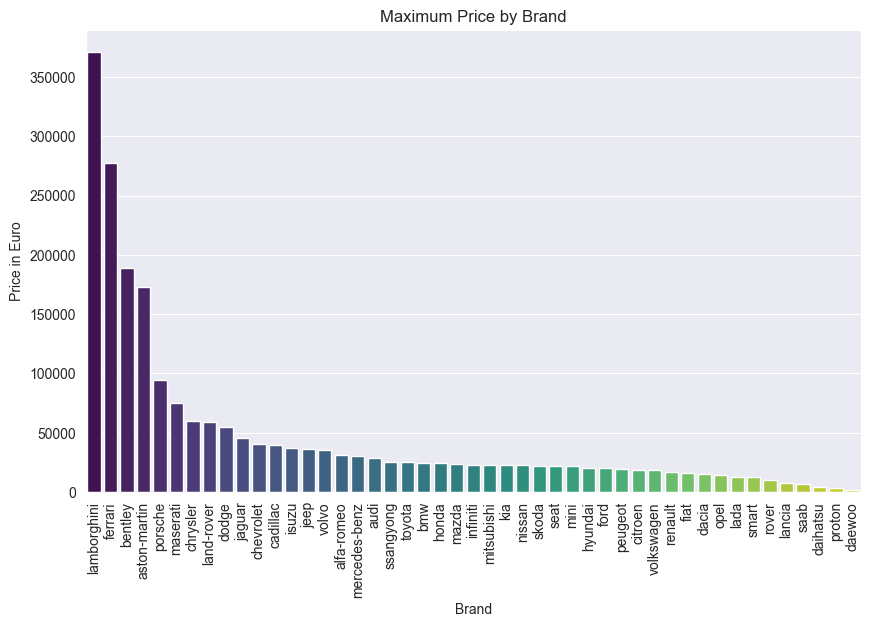

brand          offer_description                               
lamborghini    CENTENARIO ROADSTER LP770-4 |1 OF 20 |NO MILEAGE    5890500.0
               Sian                                                3250000.0
mercedes-benz  722 MSO McLaren Edition 1 of 25 worldwide  Nr.12    2490000.0
aston-martin   One-77 I Bang Olufsen I Carbon I Q-Ausstattung      2289000.0
porsche        Spyder WEISSACH PAKET MAGNESIUM FELGEN              1990000.0
               CARRERA GT | NR. 1234 | UNIQUE COLOR COMBO          1580000.0
               1.Hd Deutsches Fahrzeug !! Mwst awb!!               1549000.0
               Carrera GTS Cabrio nur 27.000km Komfortpaket        1350000.0
               Spyder | Weissach-Package | service new             1290000.0
ferrari        *TDF 1of799*Ferrari-Dresden*                        1290000.0
aston-martin   V12 Speedster                                       1288000.0
               V12 Speedster 1 of 88                               1170000.0
ferrari     

In [675]:
max_prices_by_brand = (
    car_df.groupby("brand")["price_in_euro"].mean().sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=max_prices_by_brand.index,
    y=max_prices_by_brand.values,
    hue=max_prices_by_brand.index,
    palette="viridis",
    legend=False,
)
plt.title("Maximum Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Price in Euro")
plt.xticks(rotation=90)
plt.show()

elite_cars = (
    car_df.groupby(["brand", "offer_description"])["price_in_euro"]
    .max()
    .sort_values(ascending=False)
)
elite_cars.head(20)

Чтобы наш ящик с усами по ценам выглядел нормально, а не тонкой линией с кучей выбросов - отрежем цены в "грубой форме" просто визуально по барплоту цен, пусть это будет 100k EUR

Не ограничиваю датафрейм по межквартильному размаху цены, так как это может навредить данным других параметров. Поэтому убираем только выбросы до усов.

In [676]:
car_df = car_df[car_df["price_in_euro"] <= 100000]

Как мы видим, ящик стал выглядеть гораздо лучше и теперь нам надо просто убрать выбросы по правой стороне

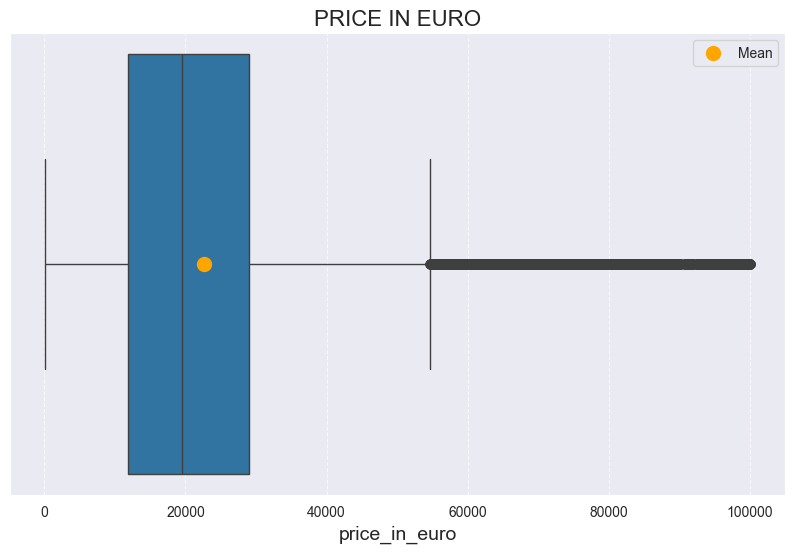

In [677]:
box_plot(cont_data(car_df), [0])

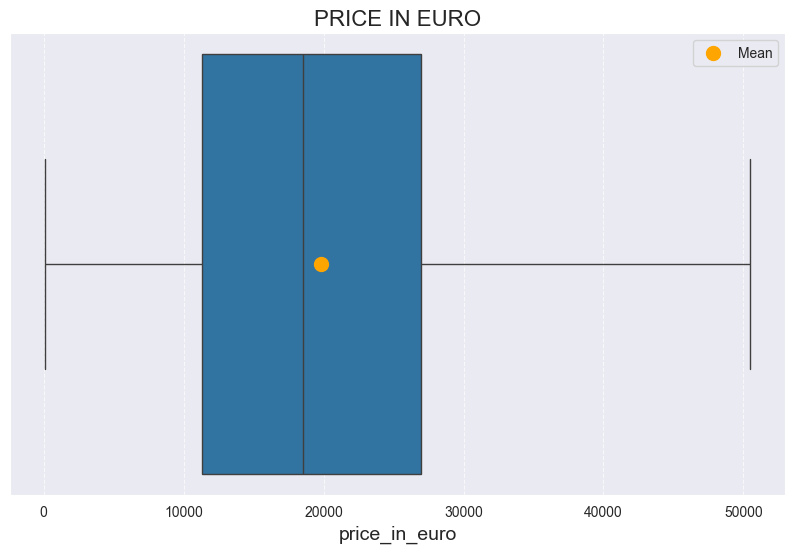

In [678]:
car_df_clr = car_df[car_df["price_in_euro"] <= 50450]
box_plot(cont_data(car_df_clr), [0])

Теперь у нас нет выбросов по цене, что значит мы смотрим на машины масс-маркета, без крутых индивидуализированных спорткаров. Сравним с первоначальным датафреймом - какой получился ущерб по данным в целом.

Ожидаемо - максимально поредели или исчезли элитно-преимальные бренды, однако костяк авто массового производства остался практичеки не поврежденным. Двигаемся дальше уже на этих очишенных данных

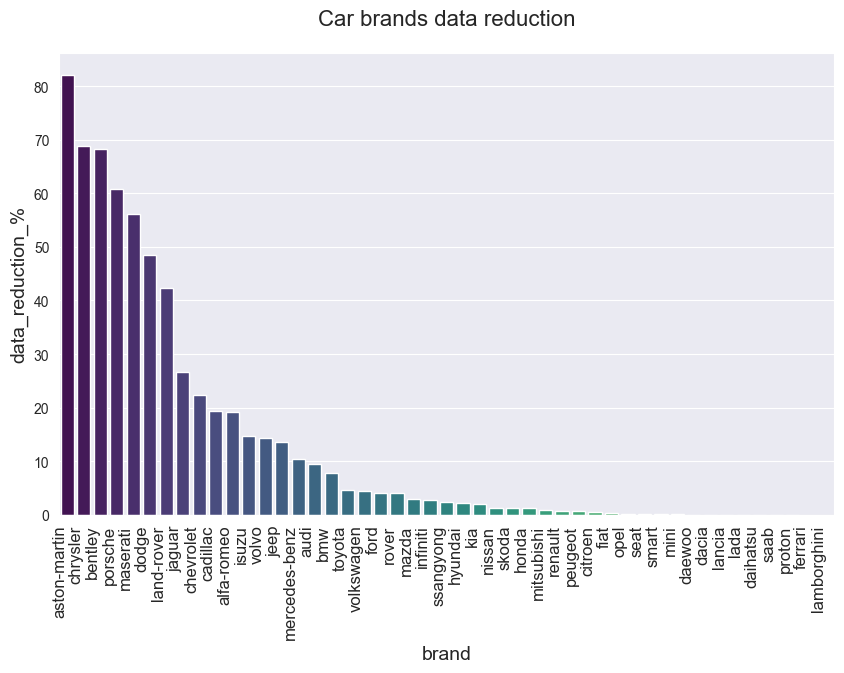

In [679]:
def dynamic_plot(plot_type, df, title, x_axis, y_axis):
    plt.figure(figsize=(10, 6))

    plot_func = getattr(sns, plot_type)
    plot_func(x=x_axis, y=y_axis, hue=x_axis, data=df, palette="viridis", legend=False)

    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(f"{x_axis}", fontsize=14)
    plt.ylabel(f"{y_axis}", fontsize=14)

    plt.xticks(rotation=90, ha="right", fontsize=12)

    plt.show()


damage_check_df = pd.merge(
    car_df["brand"].value_counts(),
    car_df_clr["brand"].value_counts(),
    on="brand",
    how="left",
    suffixes=("_init", "_cleared"),
)
damage_check_df["data_reduction_%"] = (
    1 - damage_check_df["count_cleared"] / damage_check_df["count_init"]
) * 100
damage_check_df = damage_check_df.sort_values(by="data_reduction_%", ascending=False)
dynamic_plot(
    "barplot", damage_check_df, "Car brands data reduction", "brand", "data_reduction_%"
)

После очистки от относительно немногочисленных дорогих машин наш датасет все еще выглядит подозрительно - с ценой все хорошо, а вот максимальные и минимальные данные по мощности двигателя и потреблению топлива выглядят странно.

In [680]:
cont_data(car_df_clr).describe()

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,230976.000000,230976.000000,230976.000000,206889.000000,196614.000000,2.309170e+05
mean,19849.167671,113.508568,154.413233,6.415281,136.613473,8.990165e+04
std,11222.035612,49.750332,67.612622,14.908001,51.624968,7.970307e+04
min,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,11299.000000,81.000000,110.000000,4.900000,115.000000,2.935000e+04
50%,18500.000000,103.000000,140.000000,5.600000,133.000000,7.300000e+04
75%,26960.000000,135.000000,184.000000,6.600000,157.000000,1.330000e+05
max,50450.000000,703.000000,956.000000,701.000000,999.000000,3.800000e+06


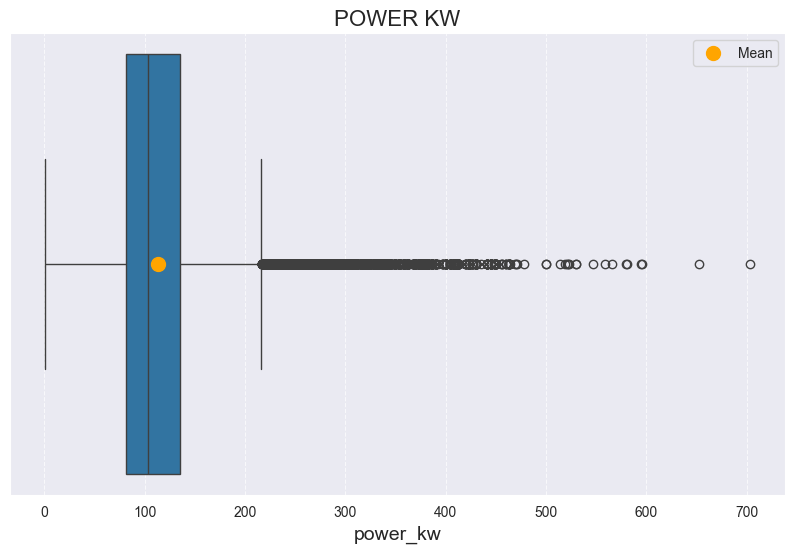

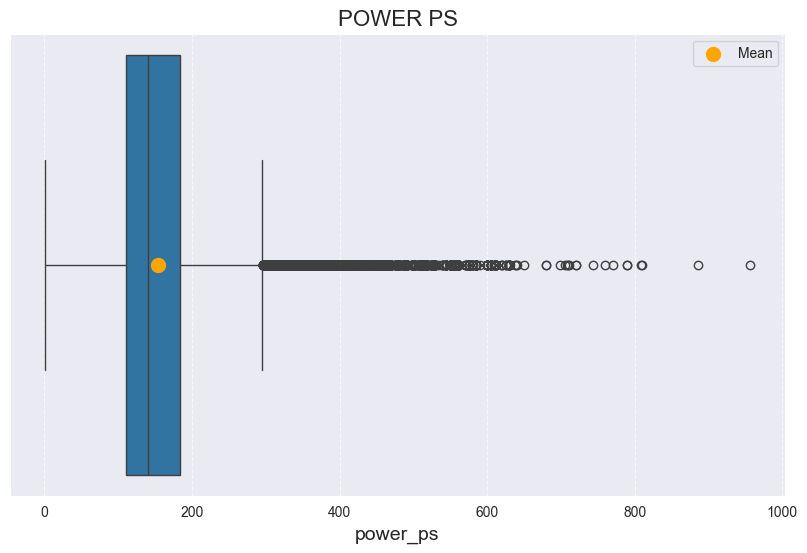

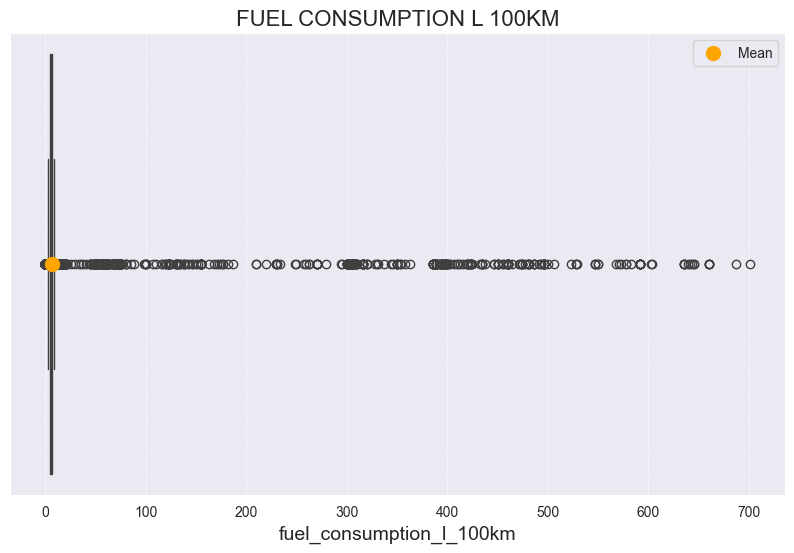

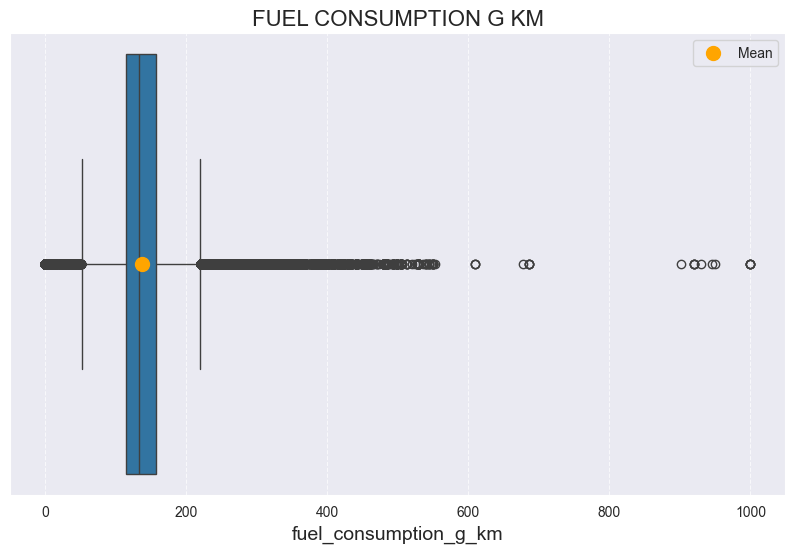

In [681]:
box_plot(cont_data(car_df_clr), [1, 2, 3, 4])

Как мы видим по техническим параметрам выбросы очень обширные и свалить все на элитный автопром уже не получится, будем искать по техническим категориальным значениям.

Похоже, что потребления топлива электрокарами указано для другой системы измерения квт/ч или что-то такое, но не литров/100 км

In [682]:
car_df_clr.groupby(["model", "fuel_type"])[
    ["power_kw", "power_ps", "fuel_consumption_l_100km", "fuel_consumption_g_km"]
].max().sort_values(by="fuel_consumption_l_100km", ascending=False)

,,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km
model,fuel_type,,,,
Volkswagen ID.4,Electric,220.0,299.0,701.0,535.0
Kia EV6,Electric,239.0,325.0,687.0,528.0
Hyundai KONA,Electric,150.0,204.0,660.0,493.0
Hyundai IONIQ 5,Electric,225.0,306.0,646.0,481.0
Toyota bZ4X,Electric,160.0,218.0,644.0,677.0
...,...,...,...,...,...
smart brabus,Electric,60.0,82.0,NaN,0.0
smart city-coupé/city-cabrio,Electric,60.0,82.0,NaN,0.0
smart forFour,CNG,60.0,82.0,NaN,NaN


Визуализируем эти показатели на графике

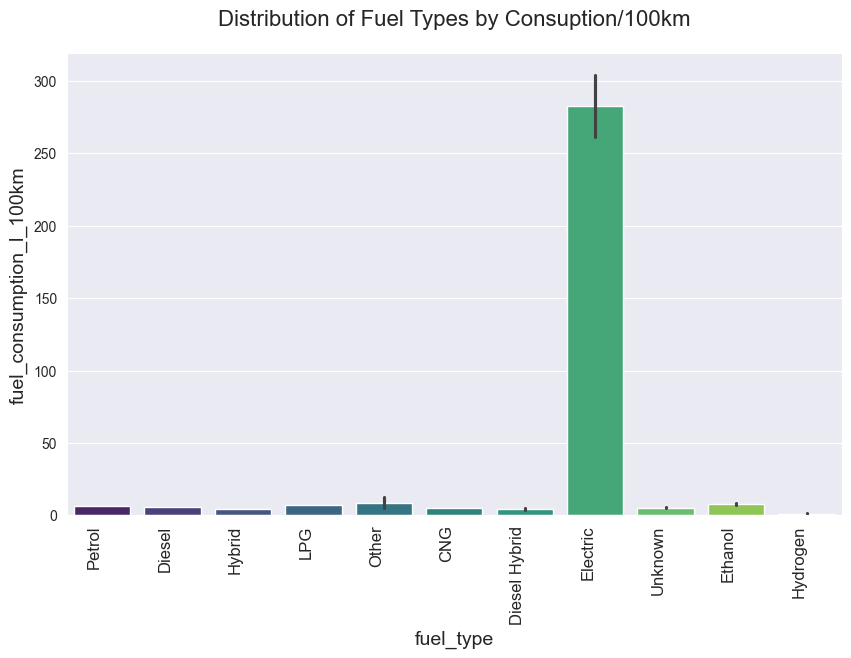

In [683]:
dynamic_plot(
    "barplot",
    car_df_clr,
    title="Distribution of Fuel Types by Consuption/100km",
    x_axis="fuel_type",
    y_axis="fuel_consumption_l_100km",
)

Посмотрим какая у нас доля (%) электрокаров относительно того, что ездит на жидком топливе

Как видно из таблицы ниже это 2% записей датафрейма, поэтому их можно исключить из дальнейшего анализа

In [684]:
car_df_clr["fuel_type"].value_counts(normalize=True) * 100

fuel_type
Petrol           57.390378
Diesel           34.810543
Hybrid            4.859379
Electric          1.967304
LPG               0.474508
CNG               0.219503
Diesel Hybrid     0.146768
Other             0.069704
Unknown           0.032038
Hydrogen          0.025544
Ethanol           0.004329
Name: proportion, dtype: float64

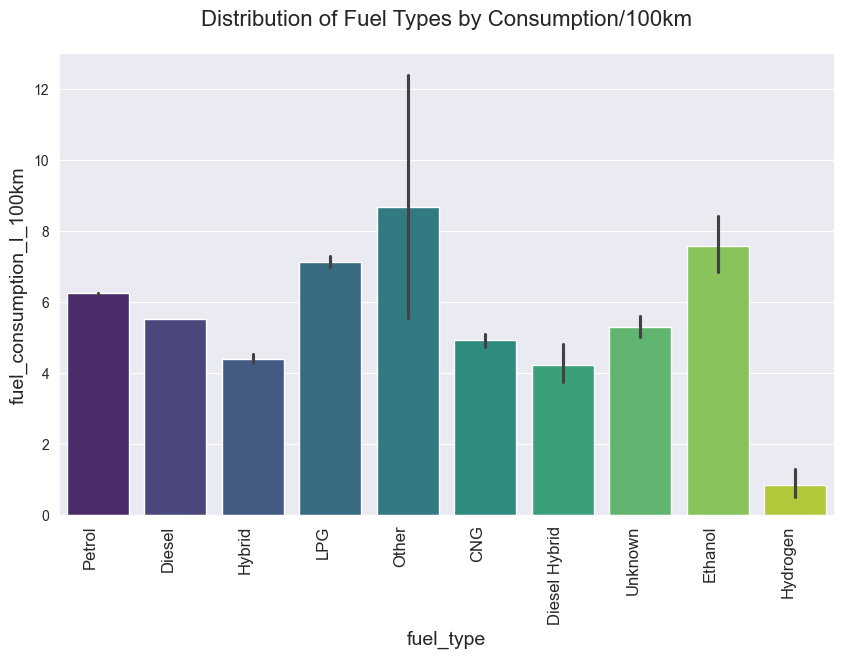

In [685]:
car_df_clr = car_df_clr[car_df_clr["fuel_type"] != "Electric"]

dynamic_plot(
    "barplot",
    car_df_clr,
    title="Distribution of Fuel Types by Consumption/100km",
    x_axis="fuel_type",
    y_axis="fuel_consumption_l_100km",
)

Заполним пропуски данных пробега

In [686]:
def data_wo_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return filtered_df

In [687]:
for fuel_cons in ["fuel_consumption_l_100km", "fuel_consumption_g_km"]:
    car_df_clr_wo_outliers = data_wo_outliers(car_df_clr, fuel_cons)

    car_df_clr[fuel_cons] = car_df_clr[fuel_cons].fillna(
        car_df_clr_wo_outliers.groupby(
            ["brand", "model", "power_ps", "transmission_type", "fuel_type"]
        )[fuel_cons].transform("mean")
    )

In [688]:
car_df.isna().mean() * 100

brand                        0.000000
model                        0.000000
color                        0.065876
registration_date            0.000000
year                         0.000000
price_in_euro                0.000000
power_kw                     0.000000
power_ps                     0.000000
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    10.942399
fuel_consumption_g_km       14.590407
mileage_in_km                0.024399
offer_description            0.000000
dtype: float64

Далее не совсем очевидно почему по некоторым моделям-годам указаны явно неадкватные показатели потребления топлива, вероятно просто некорректное занесение.

Проверим взаимосвязи мощности двигателя и потребления топлива с такими же показателями, но в других единицах измерения.


In [689]:
car_df_clr.groupby(["model", "year", "fuel_type"])[
    ["power_kw", "power_ps", "fuel_consumption_l_100km", "fuel_consumption_g_km"]
].max().sort_values(by="power_ps", ascending=False)

power_kw  power_ps  \
model                  year       fuel_type                       
Mercedes-Benz E 63 AMG 2018-01-01 Petrol        703.0     956.0   
Porsche 918            2015-01-01 Hybrid        652.0     886.0   
Audi RS6               2020-01-01 Petrol        596.0     810.0   
Dodge Challenger       2021-01-01 Petrol        595.0     809.0   
Mercedes-Benz E 63 AMG 2014-01-01 Petrol        581.0     790.0   
...                                               ...       ...   
smart forTwo           2004-01-01 Diesel         30.0      41.0   
                       2005-01-01 Diesel         30.0      41.0   
                       2007-01-01 Diesel         30.0      41.0   
Volkswagen Käfer       1998-01-01 Petrol         25.0      34.0   
BMW                    2002-01-01 Petrol         11.0      15.0   

                                             fuel_consumption_l_100km  \
model                  year       fuel_type                             
Mercedes-Benz E 63 AMG 2018-01-01 Petrol                          8.8   
Porsche 918            2015-01-01 Hybrid                          NaN   
Audi RS6               2020-01-01 Petrol                         12.4   
Dodge Challenger       2021-01-01 Petrol                          NaN   
Mercedes-Benz E 63 AMG 2014-01-01 Petrol                         10.5   
...                                                               ...   
smart forTwo           2004-01-01 Diesel                          3.4   
                       2005-01-01 Diesel                          3.4   
                       2007-01-01 Diesel                          3.8   
Volkswagen Käfer       1998-01-01 Petrol                          NaN   
BMW                    2002-01-01 Petrol                          NaN   

                                             fuel_consumption_g_km  
model                  year       fuel_type                         
Mercedes-Benz E 63 AMG 2018-01-01 Petrol                       NaN  
Porsche 918            2015-01-01 Hybrid                       NaN  
Audi RS6               2020-01-01 Petrol                     281.0  
Dodge Challenger       2021-01-01 Petrol                       NaN  
Mercedes-Benz E 63 AMG 2014-01-01 Petrol                     249.0  
...                                                            ...  
smart forTwo           2004-01-01 Diesel                       NaN  
                       2005-01-01 Diesel                      90.0  
                       2007-01-01 Diesel                     101.0  
Volkswagen Käfer       1998-01-01 Petrol                       NaN  
BMW                    2002-01-01 Petrol                       NaN  

[13835 rows x 4 columns]

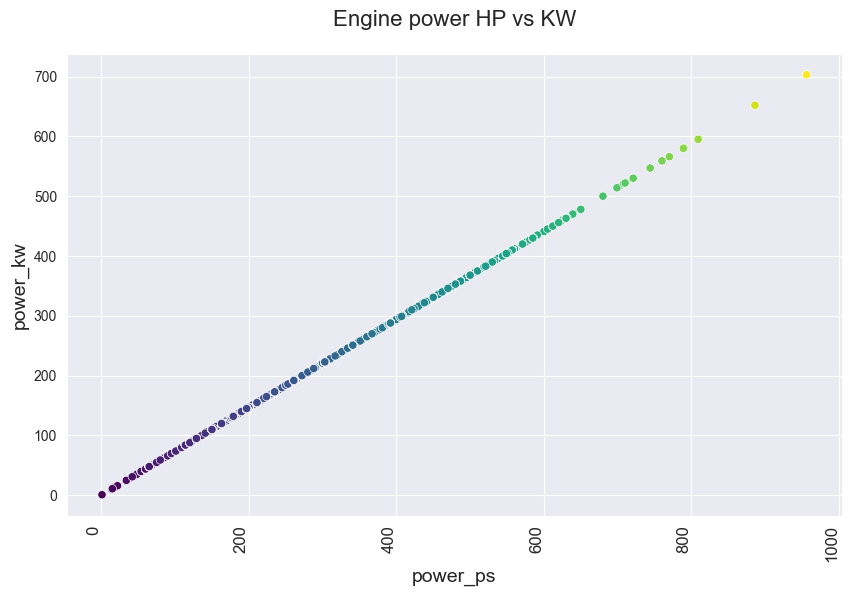

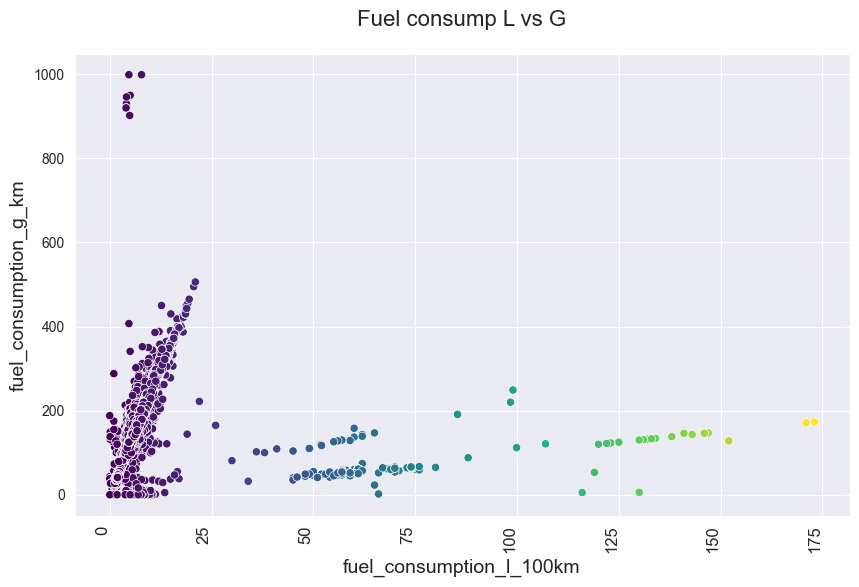

In [690]:
dynamic_plot(
    "scatterplot",
    car_df_clr,
    title="Engine power HP vs KW",
    x_axis="power_ps",
    y_axis="power_kw",
)
dynamic_plot(
    "scatterplot",
    car_df_clr,
    title="Fuel consump L vs G",
    x_axis="fuel_consumption_l_100km",
    y_axis="fuel_consumption_g_km",
)

По мощности двигателя устойчивая и почти идеальная взаимосвязь, значит на данном этапе все корректно занесено. Следовательно это не "выбросы" а просто мощные автомобили в ценовом диапазоне масс-маркета (я погуглил первые несколько моделей и таки да, это правда). А по потреблению топлива такой взаимосвязи нет.

Проверим взаимосвязь потребления топлива в рамках межквартильного размаха 25-75% - возьмем данные внутри "коробки" и проверим эту взаимосвязь еще раз.

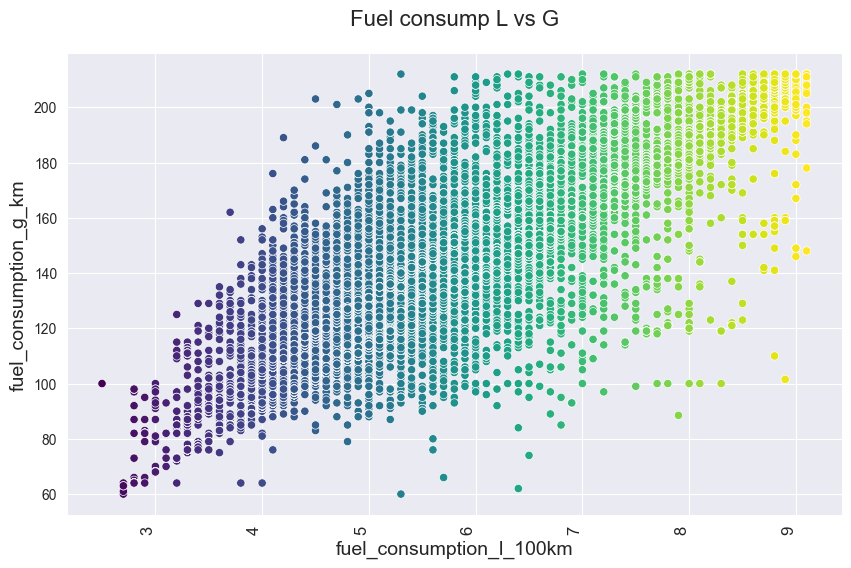

In [691]:
fuel_cons_wo_outliers = data_wo_outliers(car_df_clr, "fuel_consumption_l_100km")
fuel_cons_wo_outliers = data_wo_outliers(fuel_cons_wo_outliers, "fuel_consumption_g_km")
dynamic_plot(
    "scatterplot",
    fuel_cons_wo_outliers,
    title="Fuel consump L vs G",
    x_axis="fuel_consumption_l_100km",
    y_axis="fuel_consumption_g_km",
)

Проверим коррелиационную взаимосвязь через коэффициенты Спирмена и Кендала

In [692]:
from scipy.stats import spearmanr, kendalltau

spear_corr, spear_p_value = spearmanr(
    fuel_cons_wo_outliers["fuel_consumption_l_100km"],
    fuel_cons_wo_outliers["fuel_consumption_g_km"],
)

ken_corr, ken_p_value = kendalltau(
    fuel_cons_wo_outliers["fuel_consumption_l_100km"],
    fuel_cons_wo_outliers["fuel_consumption_g_km"],
)

print(f"Spearman correlation coeff: {spear_corr}, P-value: {spear_p_value}")
print(f"Kendall correlation coeff: {ken_corr}, P-value: {ken_p_value}")

Spearman correlation coeff: 0.9179224366049972, P-value: 0.0
Kendall correlation coeff: 0.7816664122896418, P-value: 0.0


Линейная взаимосвязь между расходом топлива литров на 100км и галлоном на 1 км очень слабая, притом, что коэффициенты корреляции довольно устойчивы. Это связано с тем, что есть общий тренд, однако внутри него идет большой разброс данных, что корреляция не учитывает. В дальнейшем анализе я не буду применять эту взаимосвязь.

Проверим гипотезу - чем мощнее двигатель, тем выше расход топлива л на 100 км на межквартильном размахе

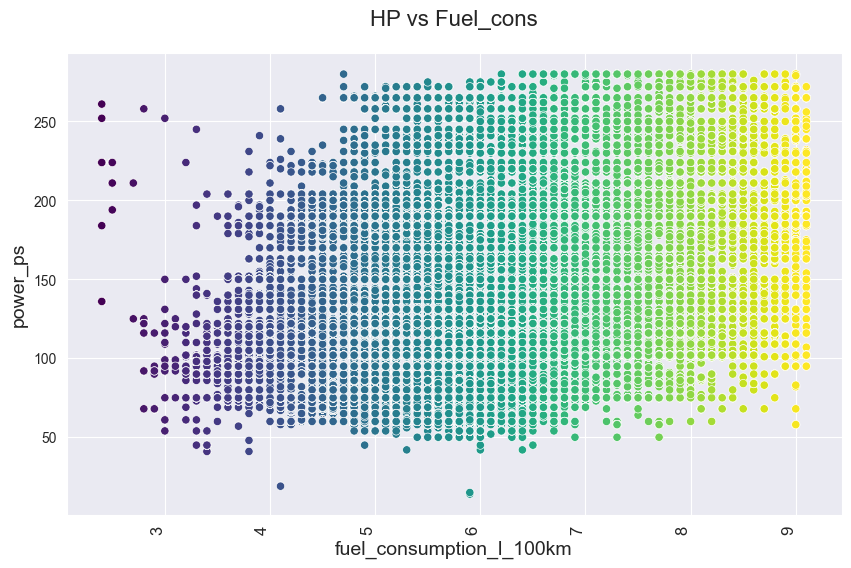

In [693]:
pwr_fuel_wo_outliers = data_wo_outliers(car_df_clr, "fuel_consumption_l_100km")
pwr_fuel_wo_outliers = data_wo_outliers(pwr_fuel_wo_outliers, "power_ps")
dynamic_plot(
    "scatterplot",
    pwr_fuel_wo_outliers,
    title="HP vs Fuel_cons",
    x_axis="fuel_consumption_l_100km",
    y_axis="power_ps",
)

Похоже, что взаимосвязи тут нет - мощный мотор может быть экономичным, а слабый прожорливым

Проверим гипотезу - чем старше машина, тем больше у нее пробег в милях

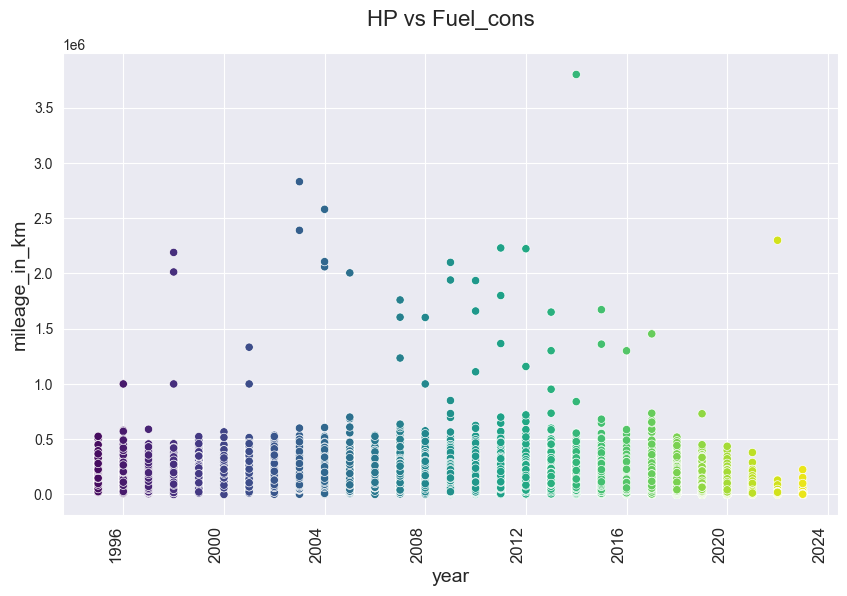

In [694]:
dynamic_plot(
    "scatterplot",
    car_df_clr,
    title="HP vs Fuel_cons",
    x_axis="year",
    y_axis="mileage_in_km",
)

Зависимость довольно слабая, только последние 4 года видно уменьшение. Можно сделать вывод, что по основной массе скручивают пробег. 

Проверим какая самая прожорливая трансмиссия и какое топливо она любит

In [695]:
tr_fuel_cons = pd.pivot_table(
    data=car_df_clr,
    index="fuel_type",
    columns="transmission_type",
    values="fuel_consumption_l_100km",
    aggfunc="mean",
)
tr_fuel_cons

transmission_type,Automatic,Manual,Semi-automatic,Unknown
fuel_type,,,,
CNG,4.795604,4.957778,NaN,4.850000
Diesel,5.690169,5.278987,5.647436,5.624104
Diesel Hybrid,3.802740,6.030000,NaN,NaN
Ethanol,NaN,7.580000,NaN,NaN
Hybrid,4.384747,4.717949,6.000000,2.891304
Hydrogen,0.841935,NaN,NaN,NaN
LPG,10.253723,6.345358,9.100000,9.300000
Other,9.810909,5.671429,NaN,NaN
Petrol,6.813915,5.915200,5.908475,6.206150


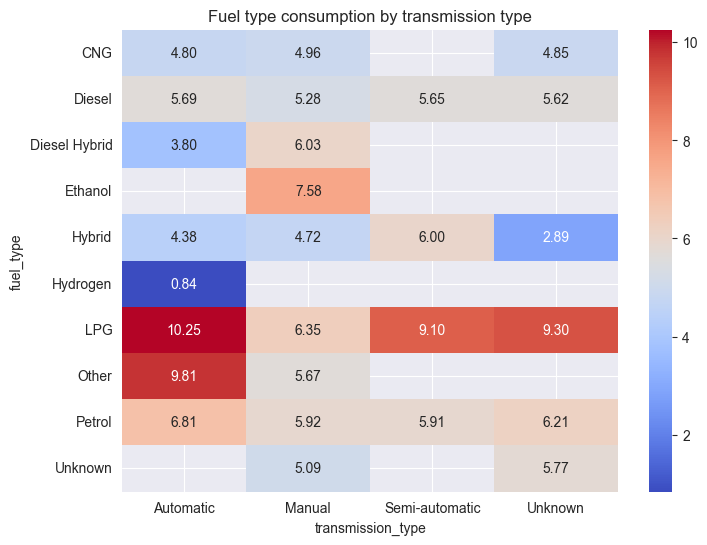

In [696]:
plt.figure(figsize=(8, 6))
sns.heatmap(tr_fuel_cons, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Fuel type consumption by transmission type")
plt.show()

Самый большой расход топлива LPG на коробке-автомат.